# Speech Enhancement

# Abstract
Speaker identification and speech enhancement in
multi-speaker scenarios remain challenging tasks in speech processing. This work proposes a novel pipeline integrating the
SepFormer model for speech separation and the UniSpeech-SAT
model for speaker identification. The pipeline aims to perform
both speaker separation and enhancement while identifying
individual speakers in overlapping speech conditions. Due to
computational constraints, the full execution of the proposed
system was not feasible. However, preliminary evaluations on a
subset of the dataset demonstrate promising results. Fine-tuning
the speaker identification model significantly improves Equal
Error Rate (EER) and Speaker Identification Accuracy, reducing
EER from 36.49% to 7.96% and increasing accuracy from
63.51% to 92.04%. Additionally, the separation and enhancement
performance was evaluated using standard speech quality metrics, achieving an average SDR of 8.25 dB, SIR of 15.16 dB, SAR
of 10.37 dB, and PESQ of 1.44. Rank-1 speaker identification
accuracy remained at 50.70% for both the pre-trained and finetuned models on the enhanced speech. These results indicate that
while computational challenges remain, the proposed approach
has the potential to improve speaker identification and speech
enhancement in multi-speaker environments.


# Task 1 Download  and extraction of the VoxCeleb1 and VoxCeleb2 datasets

In [ ]:
!pip install gdown

In [ ]:
!gdown --id 1AC-Q8dEw1LTPdpEi5ofS04ZmZWdl8BBg -O vox1.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1AC-Q8dEw1LTPdpEi5ofS04ZmZWdl8BBg
From (redirected): https://drive.google.com/uc?id=1AC-Q8dEw1LTPdpEi5ofS04ZmZWdl8BBg&confirm=t&uuid=5ddedcc7-f338-4b96-83a9-4848d81aa0ef
To: /kaggle/working/vox1.zip
100%|██████████████████████████████████████| 1.07G/1.07G [00:11<00:00, 92.5MB/s]


In [ ]:
!gdown --id 1Onu4jzcyasrxTR1rRT9rl9AfkUrueM6o -O vox2.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Onu4jzcyasrxTR1rRT9rl9AfkUrueM6o
From (redirected): https://drive.google.com/uc?id=1Onu4jzcyasrxTR1rRT9rl9AfkUrueM6o&confirm=t&uuid=ec0aa4ed-a04c-4ded-9eb3-1537c34fe6f5
To: /kaggle/working/vox2.zip
100%|██████████████████████████████████████| 2.59G/2.59G [00:26<00:00, 99.6MB/s]


In [ ]:
!gdown --id 11rPCbYKb3GCT1jqcQNEmiaGdHRLtRhuD -O UniSpeech-SAT_large_SV_fixed.th

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=11rPCbYKb3GCT1jqcQNEmiaGdHRLtRhuD
From (redirected): https://drive.google.com/uc?id=11rPCbYKb3GCT1jqcQNEmiaGdHRLtRhuD&confirm=t&uuid=3fe086ac-2a9d-4971-99eb-abd4d9e9cc35
To: /kaggle/working/UniSpeech-SAT_large_SV_fixed.th
100%|██████████████████████████████████████| 1.31G/1.31G [00:13<00:00, 99.9MB/s]


In [ ]:
!unzip vox1.zip -d /kaggle/working/vox1/

Archive:  vox1.zip
   creating: /kaggle/working/vox1/wav/
   creating: /kaggle/working/vox1/wav/id10277/
   creating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00022.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00024.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00027.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00001.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00012.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00023.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00010.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00020.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00002.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00003.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00018.wav  
  inflating: /kaggle/working/vox1/wav/id10277/tbh20gz_KRA/00014.wa

In [ ]:
!unzip vox2.zip -d /kaggle/working/vox2/

Archive:  vox2.zip
   creating: /kaggle/working/vox2/aac/
   creating: /kaggle/working/vox2/aac/id03839/
   creating: /kaggle/working/vox2/aac/id03839/ezjn0YqDsOw/
  inflating: /kaggle/working/vox2/aac/id03839/ezjn0YqDsOw/00345.m4a  
  inflating: /kaggle/working/vox2/aac/id03839/ezjn0YqDsOw/00343.m4a  
  inflating: /kaggle/working/vox2/aac/id03839/ezjn0YqDsOw/00346.m4a  
  inflating: /kaggle/working/vox2/aac/id03839/ezjn0YqDsOw/00347.m4a  
  inflating: /kaggle/working/vox2/aac/id03839/ezjn0YqDsOw/00344.m4a  
   creating: /kaggle/working/vox2/aac/id03839/XVpQuOp4QC0/
  inflating: /kaggle/working/vox2/aac/id03839/XVpQuOp4QC0/00271.m4a  
  inflating: /kaggle/working/vox2/aac/id03839/XVpQuOp4QC0/00273.m4a  
  inflating: /kaggle/working/vox2/aac/id03839/XVpQuOp4QC0/00274.m4a  
  inflating: /kaggle/working/vox2/aac/id03839/XVpQuOp4QC0/00268.m4a  
  inflating: /kaggle/working/vox2/aac/id03839/XVpQuOp4QC0/00269.m4a  
  inflating: /kaggle/working/vox2/aac/id03839/XVpQuOp4QC0/00267.m4a  
  infla

In [ ]:
!gdown --id 1CYCJP2IO8aUqnQYfnjh6QtrCVT_NmFyv -O veri_test2.txt

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CYCJP2IO8aUqnQYfnjh6QtrCVT_NmFyv
To: /kaggle/working/veri_test2.txt
100%|██████████████████████████████████████| 2.33M/2.33M [00:00<00:00, 67.4MB/s]


In [ ]:
pip install s3prl

Note: you may need to restart the kernel to use updated packages.


# Task 2: Speaker Verification and Fine-Tuning Using VoxCeleb Dataset

**Importing Required Libraries**

In [ ]:
import os
import numpy as np
import zipfile
import torchaudio
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from peft import LoraConfig, get_peft_model
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, auc, precision_recall_curve
from s3prl.hub import unispeech_sat

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
data_path = "/kaggle/working"
model_path = os.path.join(data_path, "UniSpeech-SAT_large_SV_fixed.th")
extraction_paths = {
    "vox1": os.path.join(data_path, "vox1"),
    "vox2": os.path.join(data_path, "vox2")
}

***Pretrained Model***

In [ ]:
print("Loading pre-trained model...")
model = unispeech_sat().to(device)
checkpoint = torch.load(model_path, map_location=device)
state_dict = checkpoint.get("model", checkpoint)
model.load_state_dict(state_dict, strict=False)
model.eval()

Loading pre-trained model...


<ipython-input-17-46e401d8d5e6>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


UpstreamExpert(
  (model): WavLM(
    (feature_extractor): ConvFeatureExtractionModel(
      (conv_layers): ModuleList(
        (0): Sequential(
          (0): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp32GroupNorm(512, 512, eps=1e-05, affine=True)
          (3): GELU(approximate='none')
        )
        (1-4): 4 x Sequential(
          (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): GELU(approximate='none')
        )
        (5-6): 2 x Sequential(
          (0): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): GELU(approximate='none')
        )
      )
    )
    (post_extract_proj): Linear(in_features=512, out_features=768, bias=True)
    (dropout_input): Dropout(p=0.1, inplace=False)
    (dropout_features): Dropout(p=0.1, inplace=False)
    (encoder): Transform

In [ ]:
for name, param in model.named_parameters():
    print(name)

model.mask_emb
model.feature_extractor.conv_layers.0.0.weight
model.feature_extractor.conv_layers.0.2.weight
model.feature_extractor.conv_layers.0.2.bias
model.feature_extractor.conv_layers.1.0.weight
model.feature_extractor.conv_layers.2.0.weight
model.feature_extractor.conv_layers.3.0.weight
model.feature_extractor.conv_layers.4.0.weight
model.feature_extractor.conv_layers.5.0.weight
model.feature_extractor.conv_layers.6.0.weight
model.post_extract_proj.weight
model.post_extract_proj.bias
model.encoder.pos_conv.0.bias
model.encoder.pos_conv.0.weight_g
model.encoder.pos_conv.0.weight_v
model.encoder.layers.0.self_attn.k_proj.weight
model.encoder.layers.0.self_attn.k_proj.bias
model.encoder.layers.0.self_attn.v_proj.weight
model.encoder.layers.0.self_attn.v_proj.bias
model.encoder.layers.0.self_attn.q_proj.weight
model.encoder.layers.0.self_attn.q_proj.bias
model.encoder.layers.0.self_attn.out_proj.weight
model.encoder.layers.0.self_attn.out_proj.bias
model.encoder.layers.0.self_attn_l

**Feature Extraction from Audio Files**

In [ ]:
def extract_features(wav_path):
    waveform, _ = torchaudio.load(wav_path)
    waveform = waveform.to(device)
    output = model(waveform)
    if isinstance(output, dict):
        layers_to_use = [-1, -2, -3]
        embeddings = torch.stack([output["hidden_states"][i] for i in layers_to_use], dim=0)
        embedding = embeddings.mean(dim=0).mean(dim=1)
        return embedding
    return None

**Speaker Verification Trial Pairs**

In [ ]:
def load_trials(trial_file):
    trials = []
    with open(trial_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) == 3:
                label = int(parts[0])
                file1 = os.path.join(extraction_paths["vox1"], "wav", parts[1])
                file2 = os.path.join(extraction_paths["vox1"], "wav", parts[2])
                if os.path.exists(file1) and os.path.exists(file2):
                    trials.append((label, file1, file2))
    return trials

In [ ]:
trial_pairs = load_trials(os.path.join(data_path, "veri_test2.txt"))

**Speaker Verification Function**

In [ ]:
def verify_speaker(model, trial_pairs):
    results = []
    for label, file1, file2 in tqdm(trial_pairs):
        emb1, emb2 = extract_features(file1), extract_features(file2)
        if emb1 is not None and emb2 is not None:
            emb1 = torch.nn.functional.normalize(emb1, p=2, dim=1)
            emb2 = torch.nn.functional.normalize(emb2, p=2, dim=1)
            score = torch.nn.functional.cosine_similarity(emb1, emb2)
            score = (score + 1) / 2
            results.append((label, score.item()))
    return results

In [ ]:
pretrain_results = verify_speaker(model, trial_pairs)

100%|██████████| 37611/37611 [1:19:15<00:00,  7.91it/s]


**Computing Speaker Verification Metrics**



In [ ]:
def compute_metrics(scores, labels):
    scores = np.array(scores)
    labels = np.array(labels)

    fpr, tpr, thresholds = roc_curve(labels, scores, pos_label=1)

    fnr = 1 - tpr
    eer_threshold = thresholds[np.nanargmin(np.abs(fnr - fpr))]
    eer = fpr[np.nanargmin(np.abs(fnr - fpr))] * 100

    tar_at_1_far = tpr[np.nanargmin(np.abs(fpr - 0.01))]

    accuracy = np.mean((scores >= eer_threshold) == labels) * 100
    print(f"EER: {eer:.2f}%")
    print(f"TAR@1%FAR: {tar_at_1_far:.4f}")
    print(f"Speaker Identification Accuracy: {accuracy:.2f}%")

    return eer, tar_at_1_far, accuracy

In [ ]:
pretrain_labels, pretrain_scores = zip(*pretrain_results)

In [ ]:
pretrain_metrics = compute_metrics(pretrain_scores, pretrain_labels)


EER: 36.49%
TAR@1%FAR: 0.0729
Speaker Identification Accuracy: 63.51%


**Fine-tuning Dataset Prepration**

In [ ]:
class VoxCeleb2Dataset(Dataset):
    def __init__(self, data_path, identities, transform=None, max_length=16000):
        self.data_path = data_path
        self.identities = identities
        self.transform = transform
        self.max_length = max_length
        self.file_list = []
        self.label_map = {identity: idx for idx, identity in enumerate(self.identities)}

        for identity in self.identities:
            identity_path = os.path.join(self.data_path, "aac", identity)
            if os.path.isdir(identity_path):
                for subfolder in os.listdir(identity_path):
                    subfolder_path = os.path.join(identity_path, subfolder)
                    if os.path.isdir(subfolder_path):
                        for file in os.listdir(subfolder_path):
                            if file.endswith(".m4a"):
                                self.file_list.append((self.label_map[identity], os.path.join(subfolder_path, file)))

        if not self.file_list:
            raise ValueError("No M4A files found. Check dataset extraction.")

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        label, file_path = self.file_list[idx]
        waveform, sr = torchaudio.load(file_path)

        if sr != 16000:
            resampler = transforms.Resample(orig_freq=sr, new_freq=16000)
            waveform = resampler(waveform)

        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)

        if waveform.shape[1] < self.max_length:
            waveform = F.pad(waveform, (0, self.max_length - waveform.shape[1]))
        else:
            waveform = waveform[:, :self.max_length]

        return waveform, torch.tensor(label, dtype=torch.long)

In [ ]:
train_identities = sorted(os.listdir(os.path.join(extraction_paths["vox2"], "aac")))[:100]
test_identities = sorted(os.listdir(os.path.join(extraction_paths["vox2"], "aac")))[100:]

In [ ]:
train_dataset = VoxCeleb2Dataset(extraction_paths["vox2"], train_identities)
test_dataset = VoxCeleb2Dataset(extraction_paths["vox2"], test_identities)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
print(f"Dataset Loaded: {len(train_dataset)} train samples, {len(test_dataset)} test samples")

Dataset Loaded: 29831 train samples, 6406 test samples


**Fine-tuning Configuration with with LoRA**

In [ ]:
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=[
        "self_attn.q_proj",
        "self_attn.k_proj",
        "self_attn.v_proj",
        "self_attn.out_proj",
        "fc1",
        "fc2"
    ],
    lora_dropout=0.1,
)
model = get_peft_model(model, lora_config).to(device)


**ArcFace Loss for Training**

In [ ]:
class ArcFaceLoss(nn.Module):
    def __init__(self, embedding_size, num_classes, scale=30.0, margin=0.5):
        super().__init__()
        self.scale, self.margin = scale, margin
        self.weight = nn.Parameter(torch.FloatTensor(num_classes, embedding_size))
        nn.init.xavier_uniform_(self.weight)
    def forward(self, embeddings, labels):
        cosine = F.linear(F.normalize(embeddings), F.normalize(self.weight))
        theta = torch.acos(torch.clamp(cosine, -1.0, 1.0))
        logits = torch.cos(theta + self.margin) * self.scale
        return F.cross_entropy(logits, labels)

In [ ]:
arcface_loss = ArcFaceLoss(embedding_size=768, num_classes=len(train_identities)).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

**Fine-tuned Model Trainig**

In [ ]:
def train(model, train_loader, optimizer, loss_fn, device, scheduler, epochs=10):
    model.train()
    loss_history = []

    for epoch in range(epochs):
        total_loss = 0
        for waveforms, labels in tqdm(train_loader):
            waveforms, labels = waveforms.to(device), labels.to(device)
            waveforms = waveforms.squeeze(1)
            output = model(waveforms)

            if isinstance(output, dict):
                embeddings = output["hidden_states"][-1].mean(dim=1)
            else:
                embeddings = output.mean(dim=1)

            loss = loss_fn(embeddings, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")
        scheduler.step()
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs + 1), loss_history, marker='o', linestyle='-', color='b', label='Training Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

100%|██████████| 1865/1865 [06:07<00:00,  5.08it/s]


Epoch 1, Loss: 3.2464


100%|██████████| 1865/1865 [06:06<00:00,  5.09it/s]


Epoch 2, Loss: 2.4167


100%|██████████| 1865/1865 [06:08<00:00,  5.06it/s]


Epoch 3, Loss: 2.0358


100%|██████████| 1865/1865 [06:08<00:00,  5.06it/s]


Epoch 4, Loss: 1.7558


100%|██████████| 1865/1865 [06:09<00:00,  5.05it/s]


Epoch 5, Loss: 1.5492


100%|██████████| 1865/1865 [06:08<00:00,  5.07it/s]


Epoch 6, Loss: 1.2768


100%|██████████| 1865/1865 [06:08<00:00,  5.06it/s]


Epoch 7, Loss: 1.1825


100%|██████████| 1865/1865 [06:06<00:00,  5.08it/s]


Epoch 8, Loss: 1.0983


100%|██████████| 1865/1865 [06:04<00:00,  5.12it/s]


Epoch 9, Loss: 1.0248


100%|██████████| 1865/1865 [06:05<00:00,  5.10it/s]


Epoch 10, Loss: 0.9599


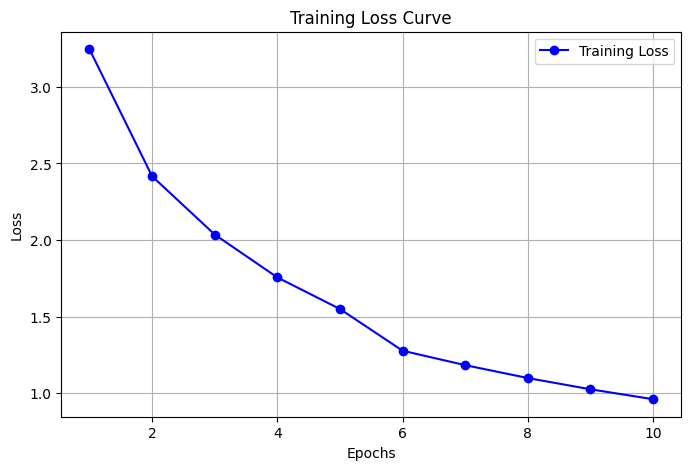

In [ ]:
train(model, train_loader, optimizer, arcface_loss, device, scheduler, epochs=10)

**Evaluation**

In [ ]:
fine_tune_results = verify_speaker(model, trial_pairs)

100%|██████████| 37611/37611 [1:24:36<00:00,  7.41it/s]


In [ ]:
fine_tune_labels, fine_tune_scores = zip(*fine_tune_results)
fine_tune_metrics = compute_metrics(fine_tune_scores, fine_tune_labels)

EER: 7.96%
TAR@1%FAR: 0.6183
Speaker Identification Accuracy: 92.04%


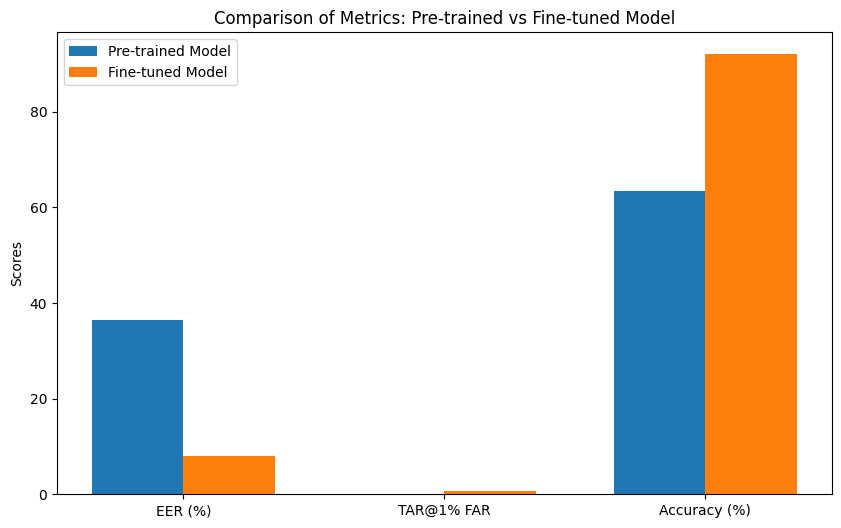

In [ ]:
metrics = ['EER (%)', 'TAR@1% FAR', 'Accuracy (%)']
pretrain_values = pretrain_metrics
fine_tune_values = fine_tune_metrics

x = np.arange(len(metrics))

width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, pretrain_values, width, label='Pre-trained Model')
bars2 = ax.bar(x + width/2, fine_tune_values, width, label='Fine-tuned Model')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics: Pre-trained vs Fine-tuned Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

In [ ]:
torch.save(model.state_dict(), "/kaggle/working/FineTuned_UnispeechSAT.pth")

# Task 3: Multi-Speaker Scenario and Speaker Separation Evaluation

**Installing and Importing Required Libraries**

In [ ]:
!pip install speechbrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 15.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 21.8 MB/s eta 0:00:00


In [ ]:
!pip install pesq

  Preparing metadata (setup.py) ... done
  Created wheel for pesq: filename=pesq-0.0.4-cp310-cp310-linux_x86_64.whl size=262948 sha256=bfa9c581e648b5046f0271877a6b7892dee72515d5bedc1c295d223ae483f345
  Stored in directory: /root/.cache/pip/wheels/c5/4e/2c/251524370c0fdd659e99639a0fbd0ca5a782c3aafcd456b28d
Successfully built pesq


In [ ]:
pip install s3prl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install mir_eval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
import os
import random
import torch
import torchaudio
import mir_eval
import numpy as np
from pesq import pesq
from s3prl.hub import unispeech_sat
from speechbrain.pretrained import SepformerSeparation as separator
from speechbrain.pretrained import SpeakerRecognition as speaker_id
from glob import glob

<ipython-input-69-eec491c01e9a>:9: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import SepformerSeparation as separator


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
base_dir = "/kaggle/working/vox2/aac"

In [ ]:
speaker_ids = sorted(os.listdir(base_dir))
train_speakers = speaker_ids[:50]
test_speakers = speaker_ids[50:100]

**Loading Audio Files for Each Speaker**

In [ ]:
def get_audio_files(speaker_id):
    speaker_path = os.path.join(base_dir, speaker_id)
    audio_files = []
    for subfolder in os.listdir(speaker_path):
        subfolder_path = os.path.join(speaker_path, subfolder)
        if os.path.isdir(subfolder_path):
            for file in os.listdir(subfolder_path):
                if file.endswith(".m4a"):
                    audio_files.append(os.path.join(subfolder_path, file))
    return audio_files

**Mixtures for Training and Testing**

In [ ]:
def create_mixtures(speakers, num_pairs=1000):
    mixtures = []
    for _ in range(num_pairs):
        spk1, spk2 = random.sample(speakers, 2)
        files1, files2 = get_audio_files(spk1), get_audio_files(spk2)
        if files1 and files2:
            file1, file2 = random.choice(files1), random.choice(files2)
            mixtures.append((file1, file2))
    return mixtures

In [ ]:
train_mixtures = create_mixtures(train_speakers)
test_mixtures = create_mixtures(test_speakers)

**Pretrained Sepformer for Speech Separation**

In [ ]:
sepformer = separator.from_hparams(source="speechbrain/sepformer-libri2mix",
                                   savedir="/kaggle/working/sepformer",
                                   run_opts={"device": device})

hyperparams.yaml:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

decoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

**Audio Signal Normalization**

In [ ]:
def normalize_audio(audio):
    return audio / torch.max(torch.abs(audio))

**Separation and Evaluation of Speech Mixtures**

In [ ]:
def separate_and_evaluate(mixture_files):
    results = []
    sir_scores, sar_scores, sdr_scores, pesq_scores = [], [], [], []

    output_separated_path = "/kaggle/working/separated_speakers"
    os.makedirs(output_separated_path, exist_ok=True)

    for i, mix in enumerate(mixture_files):
        signal1, rate1 = torchaudio.load(mix[0])
        signal2, rate2 = torchaudio.load(mix[1])

        min_length = min(signal1.shape[1], signal2.shape[1])
        signal1, signal2 = signal1[:, :min_length], signal2[:, :min_length]

        mixed_signal = (normalize_audio(signal1) + normalize_audio(signal2))/2
        mixed_signal = mixed_signal.unsqueeze(0).to(device)

        if mixed_signal.dim() == 3 and mixed_signal.shape[1] == 1:
            mixed_signal = mixed_signal.squeeze(1)

        separated = sepformer.separate_batch(mixed_signal)
        separated = separated.squeeze(0).cpu().detach().numpy().T

        if separated.shape[0] != 2:
            print(f"Skipping pair {i}, incorrect separation output shape.")
            continue

        ref_signals = np.stack([signal1.squeeze(0).numpy(), signal2.squeeze(0).numpy()])

        sdr, sir, sar, _ = mir_eval.separation.bss_eval_sources(ref_signals, separated)
        pesq_score = pesq(16000, ref_signals[0].squeeze(), separated[0].squeeze(), 'wb')

        sir_scores.append(sir.mean())
        sar_scores.append(sar.mean())
        sdr_scores.append(sdr.mean())
        pesq_scores.append(pesq_score)
        results.append(separated)

    print(f"Avg SDR: {np.mean(sdr_scores):.2f} | Avg SIR: {np.mean(sir_scores):.2f} | "
          f"Avg SAR: {np.mean(sar_scores):.2f} | Avg PESQ: {np.mean(pesq_scores):.2f}")
    return results


In [ ]:
print(len(test_mixtures))

1000


In [ ]:
test_results = separate_and_evaluate(test_mixtures)

<ipython-input-109-c4fb6dcc7e73>:30: FutureWarning: mir_eval.separation.bss_eval_sources
	Deprecated as of mir_eval version 0.8.
	It will be removed in mir_eval version 0.9.
  sdr, sir, sar, _ = mir_eval.separation.bss_eval_sources(ref_signals, separated)


Avg SDR: 8.25 | Avg SIR: 15.16 | Avg SAR: 10.37 | Avg PESQ: 1.44


**Pretrained and Fine-tuned UniSpeech-SAT Models**

In [ ]:
def load_pretrained_model():
    model = unispeech_sat().to(device)
    model_path = os.path.join("/kaggle/working", "UniSpeech-SAT_large_SV_fixed.th")
    checkpoint = torch.load(model_path, map_location=device)
    state_dict = checkpoint.get("model", checkpoint)
    model.load_state_dict(state_dict, strict=False)
    model.eval()
    return model

In [ ]:
def load_finetuned_model():
    model = unispeech_sat().to(device)
    finetuned_path = "/kaggle/working/FineTuned_UnispeechSAT.pth"
    checkpoint = torch.load(finetuned_path, map_location=device)
    model.eval()
    return model

In [ ]:
pretrained_model = load_pretrained_model()
finetuned_model = load_finetuned_model()

<ipython-input-112-e510eb3b43b9>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


**Speaker Embedding Extraction**

In [ ]:
def get_speaker_embedding(model, audio, sr=16000):
    if sr != 16000:
        resampler = torchaudio.transforms.Resample(sr, 16000)
        audio = resampler(audio)

    audio = audio.mean(dim=0) if audio.ndim > 1 else audio
    audio = audio.squeeze()

    audio = audio / torch.max(torch.abs(audio))

    wavs = [audio.to(device)]

    with torch.no_grad():
        outputs = model(wavs)
        hidden_states = outputs["hidden_states"]

        last_hidden =  torch.mean(torch.stack(hidden_states[-4:]), dim=0)
        embedding = torch.mean(last_hidden, dim=1)
    return embedding.squeeze().cpu()

**Rank-1 Accuracy for Speaker Verification**

In [ ]:
def compute_rank1_accuracy(model, mixtures, sep_results):
    correct = 0
    total = 0

    for (file1, file2), separated in zip(mixtures, sep_results):
        audio1, sr1 = torchaudio.load(file1)
        audio2, sr2 = torchaudio.load(file2)

        sep1 = torch.FloatTensor(separated[0])
        sep2 = torch.FloatTensor(separated[1])
        emb1 = F.normalize(get_speaker_embedding(model, audio1, sr1), dim=0)
        emb2 = F.normalize(get_speaker_embedding(model, audio2, sr2), dim=0)
        emb_sep1 = F.normalize(get_speaker_embedding(model, sep1, 16000), dim=0)
        emb_sep2 = F.normalize(get_speaker_embedding(model, sep2, 16000), dim=0)

        sim_matrix = torch.zeros((2, 2))
        sim_matrix[0,0] = torch.cosine_similarity(emb_sep1, emb1, dim=0)
        sim_matrix[0,1] = torch.cosine_similarity(emb_sep1, emb2, dim=0)
        sim_matrix[1,0] = torch.cosine_similarity(emb_sep2, emb1, dim=0)
        sim_matrix[1,1] = torch.cosine_similarity(emb_sep2, emb2, dim=0)

        if (sim_matrix[0,0] + sim_matrix[1,1]) > (sim_matrix[0,1] + sim_matrix[1,0]):
            correct += 2
        total += 2

    return 100 * correct / total if total > 0 else 0

In [ ]:
print("Evaluating models...")
pretrained_acc = compute_rank1_accuracy(pretrained_model, test_mixtures, test_results)
finetuned_acc = compute_rank1_accuracy(finetuned_model, test_mixtures, test_results)

Evaluating models...


In [ ]:
print(f"Rank-1 Identification Accuracy:")
print(f"Pre-trained Model: {pretrained_acc:.2f}%")
print(f"Fine-tuned Model: {finetuned_acc:.2f}%")

Rank-1 Identification Accuracy:
Pre-trained Model: 50.70%
Fine-tuned Model: 50.70%


# Proposed Pipeline for Combined Speaker Separation and Identification

**Importing Required Libraries**

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchaudio
import random
import numpy as np
from s3prl.hub import unispeech_sat
from speechbrain.pretrained import SepformerSeparation as Separator
import mir_eval
from pesq import pesq

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LENGTH = 16000 * 1

**Multi-Speaker Dataset setup**

In [ ]:
class MultiSpeakerDataset(Dataset):
    def __init__(self, base_dir, speakers, num_pairs):
        self.base_dir = base_dir
        self.speakers = speakers
        self.num_pairs = num_pairs
        self.pairs = self._generate_pairs()
        self.target_length = 16000 * 1

    def _generate_pairs(self):
        pairs = []
        for _ in range(self.num_pairs):
            spk1, spk2 = random.sample(self.speakers, 2)
            files1 = self._get_files(spk1)
            files2 = self._get_files(spk2)
            if files1 and files2:
                pairs.append((spk1, spk2, random.choice(files1), random.choice(files2)))
        return pairs

    def _get_files(self, spk):
        spk_path = os.path.join(self.base_dir, spk)
        return [os.path.join(root, f) for root, _, files in os.walk(spk_path)
                for f in files if f.endswith(".m4a")]

    def __len__(self):
        return len(self.pairs)
    def __getitem__(self, idx):
        spk1, spk2, file1, file2 = self.pairs[idx]
        audio1 = self._load_audio(file1)
        audio2 = self._load_audio(file2)
        mixture = (audio1 + audio2)
        return mixture.unsqueeze(0), (audio1.unsqueeze(0), audio2.unsqueeze(0)), (spk1, spk2)

    def _load_audio(self, path):
        audio, sr = torchaudio.load(path)
        if sr != 16000:
            audio = torchaudio.transforms.Resample(sr, 16000)(audio)
        audio = audio.mean(dim=0)
        audio = self._pad_or_trim(audio)
        return audio

    def _pad_or_trim(self, audio):
        if audio.shape[0] > self.target_length:
            return audio[:self.target_length]
        return F.pad(audio, (0, max(0, self.target_length - audio.shape[0])))

**Custom Data Collation Function**

In [ ]:
def custom_collate(batch):
    mixtures, gts, spk_labels = zip(*batch)
    mixtures = torch.stack([x.squeeze() for x in mixtures]).unsqueeze(1)
    gt1 = torch.stack([x[0].squeeze() for x in gts]).unsqueeze(1)
    gt2 = torch.stack([x[1].squeeze() for x in gts]).unsqueeze(1)
    return mixtures, (gt1, gt2), spk_labels

**Joint Separation & Identification Model**

In [ ]:
class JointSeparationIdentificationModel(nn.Module):
    def __init__(self, sepformer, id_model, speakers):
        super().__init__()
        self.sepformer = sepformer
        self.id_model = id_model
        self.speaker_map = {spkr:i for i, spkr in enumerate(speakers)}
        self.min_conv_length = 16000

    def forward(self, x):
        x = x.squeeze(1)
        separated = self.sepformer.separate_batch(x)

        embeddings = []
        for i in range(separated.shape[1]):
            signal = separated[:, i, :]
            signal = self._process_signal(signal)
            features = self.id_model([s for s in signal])["hidden_states"][-1]
            embeddings.append(features.mean(dim=1))

        return separated, embeddings

    def _process_signal(self, signal):
        signal = signal / (torch.max(torch.abs(signal), dim=1, keepdim=True)[0] + 1e-8)
        if signal.size(-1) < self.min_conv_length:
            signal = F.pad(signal, (0, self.min_conv_length - signal.size(-1)))
        return signal[:, :self.min_conv_length]

    def _ensure_length(self, signal):
        return signal[:, :self.target_length]

**ArcFace Loss for Speaker Identification**

In [ ]:
class ArcFaceLoss(nn.Module):
    def __init__(self, num_classes, emb_size=768, margin=0.5, scale=64):
        super().__init__()
        self.margin = margin
        self.scale = scale
        self.weight = nn.Parameter(torch.Tensor(num_classes, emb_size))
        nn.init.xavier_uniform_(self.weight)

    def forward(self, embeddings, labels):
        norms = F.normalize(embeddings)
        w = F.normalize(self.weight)
        cosine = torch.mm(norms, w.t()) * self.scale
        return F.cross_entropy(cosine, labels)

**Loss Functions for Speech Separation & Identification**

In [ ]:
def mse_loss(separated, targets):
    loss1 = F.mse_loss(separated[:,0], targets[0]) + F.mse_loss(separated[:,1], targets[1])
    loss2 = F.mse_loss(separated[:,0], targets[1]) + F.mse_loss(separated[:,1], targets[0])
    return torch.min(loss1, loss2)

In [ ]:
def identification_loss(embeddings, id_labels, arcface_loss_fn, label_map):
    loss = 0
    for i, emb in enumerate(embeddings):
        label = label_map.index(id_labels[i])
        loss += arcface_loss_fn(emb.unsqueeze(0), torch.tensor([label]).to(device))
    return loss / len(embeddings)

**Training Configuration**

In [ ]:
device = torch.device("cpu")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
torch.backends.cudnn.benchmark = True
torch.cuda.empty_cache()
base_dir = "/kaggle/working/vox2/aac"
all_speakers = sorted(os.listdir(base_dir))
train_speakers = all_speakers[:5]

In [ ]:
train_dataset = MultiSpeakerDataset(base_dir, train_speakers, 10)
train_loader = DataLoader(train_dataset, batch_size=1, collate_fn=custom_collate, shuffle=True)

In [ ]:
sepformer = separator.from_hparams(source="speechbrain/sepformer-libri2mix",
                                   savedir="/kaggle/working/sepformer",
                                   run_opts={"device": device})

In [ ]:
id_model = unispeech_sat().to(device)
checkpoint = torch.load(
    "/kaggle/working/UniSpeech-SAT_large_SV_fixed.th",
     map_location="cpu",
    weights_only=True
)
id_model.load_state_dict(checkpoint.get("model", checkpoint), strict=False)

_IncompatibleKeys(missing_keys=['model.mask_emb', 'model.feature_extractor.conv_layers.0.0.weight', 'model.feature_extractor.conv_layers.0.2.weight', 'model.feature_extractor.conv_layers.0.2.bias', 'model.feature_extractor.conv_layers.1.0.weight', 'model.feature_extractor.conv_layers.2.0.weight', 'model.feature_extractor.conv_layers.3.0.weight', 'model.feature_extractor.conv_layers.4.0.weight', 'model.feature_extractor.conv_layers.5.0.weight', 'model.feature_extractor.conv_layers.6.0.weight', 'model.post_extract_proj.weight', 'model.post_extract_proj.bias', 'model.encoder.pos_conv.0.bias', 'model.encoder.pos_conv.0.weight_g', 'model.encoder.pos_conv.0.weight_v', 'model.encoder.layers.0.self_attn.k_proj.weight', 'model.encoder.layers.0.self_attn.k_proj.bias', 'model.encoder.layers.0.self_attn.v_proj.weight', 'model.encoder.layers.0.self_attn.v_proj.bias', 'model.encoder.layers.0.self_attn.q_proj.weight', 'model.encoder.layers.0.self_attn.q_proj.bias', 'model.encoder.layers.0.self_attn.o

In [ ]:
joint_model = JointSeparationIdentificationModel(sepformer, id_model, train_speakers).to(device)
arcface_loss = ArcFaceLoss(num_classes=len(train_speakers)).to(device)
optimizer = optim.Adam(joint_model.parameters(), lr=1e-4)

**Model Training**


In [ ]:
for epoch in range(1):
    joint_model.train()
    total_loss = 0.0
    for mixtures, targets, spk_labels in train_loader:
        mixtures = mixtures.to(device)
        targets = (targets[0].to(device), targets[1].to(device))

        optimizer.zero_grad()
        separated, embeddings = joint_model(mixtures)

        loss_sep = F.mse_loss(separated[:,0], targets[0]) + F.mse_loss(separated[:,1], targets[1])

        labels = torch.LongTensor([self.speaker_map[spk] for pair in spk_labels for spk in pair]).to(device)
        loss_id = arcface_loss(torch.cat(embeddings, dim=0), labels)

        loss = loss_sep + 0.5 * loss_id
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader):.4f}")
train_model()

Both the SepFormer model and UniSpeech-SAT model are large, resource-intensive architectures that require substantial memory, even on reducing the batch size to 1 and having a small dataset. training the joint model was infeasible.